In [1]:
# 1 라이브러리 임포트

import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn as sk

# 알고리즘을 그래픽화 하기위한 라이브러리
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import rcParams
import re
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Rescaling
import keras

# 모델생성 라이브러리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 스플릿,스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
# 1 데이터 불러오기 
path = "../Playground Series Season 3, Episode 3/playground-series-s3e3/"

train_csv = pd.read_csv(path+"train.csv")
test_csv = pd.read_csv(path+"test.csv")

In [3]:
# 2. 데이터 조회해보기
# y 값은 Attriton 이고 바이너리 
train_csv.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [4]:
# 3. 데이터 의 문자열 값 조회
print(np.unique(train_csv.BusinessTravel,return_counts=1),"\n",
np.unique(train_csv.Department,return_counts=1),"\n",
np.unique(train_csv.EducationField,return_counts=1))


(array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object), array([ 126,  261, 1290], dtype=int64)) 
 (array(['Human Resources', 'Research & Development', 'Sales'], dtype=object), array([  39, 1167,  471], dtype=int64)) 
 (array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object), array([ 13, 775, 152, 549,  82, 106], dtype=int64))


In [5]:
# 4. 데이터의 결측치 확인
train_csv.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [6]:
# 학습데이터의 고유값 조회
train_csv.nunique()

id                          1677
Age                           43
BusinessTravel                 3
DailyRate                    625
Department                     3
DistanceFromHome              29
Education                      6
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       6
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                895
MonthlyRate                  903
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [7]:
# 값이 1개인 칼럼만을 조회
train_csv.nunique()[train_csv.nunique() == 1]

EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64

In [8]:
# 값이 1개인 칼럼 삭제
train_csv.drop(["EmployeeCount", "Over18", "StandardHours","id"], axis=1, inplace=True)
test_csv.drop(["EmployeeCount", "Over18", "StandardHours","id"], axis=1, inplace=True)

In [9]:
train_csv = pd.get_dummies(train_csv)
test_csv = pd.get_dummies(test_csv)

In [10]:
# train 의 칼럼이 56개로 늘어남 ㄷㄷ
print(train_csv.shape,test_csv.shape)

(1677, 52) (1119, 51)


In [17]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y = train_csv.Attrition
df = train_csv.drop(["Attrition"],axis=1)
df[df.columns] = scaler.fit_transform(df[df.columns])

In [ ]:
train_df = df.iloc[:-len(test_csv),:]
train_df['Attrition'] = y[:-len(test_csv)]
test_df = df.iloc[-len(test_csv):,:].reset_index(drop=True)

x = train_df.drop('Attrition', axis=1)
y = train_df.Attrition
test_csv = test_df

In [12]:
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import layers

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda, Concatenate, Add, BatchNormalization, LeakyReLU

from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold

from sklearn.metrics import classification_report


c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.7.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [13]:
models = []
preds = []

class_weight = 10 

n_folds = 10 
repeats = 10  
dr = 0.2     

# k_fold = StratifiedKFold(n_splits=n_folds, random_state=42, shuffle=True)
k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=repeats, random_state=42)

def get_model():
    model = keras.Sequential([
    layers.Dense(512), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(256), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(128), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(64), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.BatchNormalization(),
    layers.Dense(32), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(16), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(8),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(4), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dense(2), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dense(1, activation='sigmoid')
   ])

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    
    model.compile(
    optimizer=opt,
        loss=tfa.losses.SigmoidFocalCrossEntropy(
                                             alpha=0.8,
                                             gamma=2.0
                                             ),
        metrics='AUC',
)
    
    return model



early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_auc", 
        mode='max',
        patience=30,
        min_delta=0.00001,
        restore_best_weights=True,
)
plat = keras.callbacks.ReduceLROnPlateau(
        monitor="val_auc", 
        mode='max', 
        patience=3, 
        factor=0.1, 
        min_lr=1e-8, 
        min_delta=0.000001)


for train_index, test_index in k_fold.split(x, y):
    X_train, X_valid = x.iloc[train_index], x.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model = get_model()

    history = model.fit(
          X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=64,
          epochs=500,
          class_weight = { 0: 1.0, 1: class_weight, },
          callbacks=[early_stopping, plat],
          verbose=1
         )
    
    print(classification_report(y, np.round(model.predict(x))))
    models.append(model)
    preds.append(model.predict(test_csv))

Epoch 1/500
24/24 [==============================] - 2s 20ms/step - loss: 0.1936 - auc: 0.5226 - val_loss: 0.0460 - val_auc: 0.5133 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1845 - auc: 0.5722 - val_loss: 0.0468 - val_auc: 0.5314 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1817 - auc: 0.5780 - val_loss: 0.0469 - val_auc: 0.5642 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1800 - auc: 0.5490 - val_loss: 0.0470 - val_auc: 0.6003 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1741 - auc: 0.5718 - val_loss: 0.0471 - val_auc: 0.5799 - lr: 1.0000e-04
Epoch 6/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1653 - auc: 0.5874 - val_loss: 0.0473 - val_auc: 0.5689 - lr: 1.0000e-04
Epoch 7/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1737 - auc: 0.5308 - val_loss: 0.04

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 19ms/step - loss: 0.2648 - auc: 0.4898 - val_loss: 0.0435 - val_auc: 0.7051 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2368 - auc: 0.5367 - val_loss: 0.0452 - val_auc: 0.6463 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2129 - auc: 0.5145 - val_loss: 0.0446 - val_auc: 0.6728 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2057 - auc: 0.5467 - val_loss: 0.0458 - val_auc: 0.6910 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2060 

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 19ms/step - loss: 0.1772 - auc: 0.5540 - val_loss: 0.0483 - val_auc: 0.4747 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1725 - auc: 0.5488 - val_loss: 0.0473 - val_auc: 0.5426 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1725 - auc: 0.5156 - val_loss: 0.0504 - val_auc: 0.5198 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1669 - auc: 0.5380 - val_loss: 0.0520 - val_auc: 0.5258 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 10ms/step - loss: 0.161

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 2s 19ms/step - loss: 0.2638 - auc: 0.5009 - val_loss: 0.0427 - val_auc: 0.6157 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2391 - auc: 0.5315 - val_loss: 0.0433 - val_auc: 0.6284 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2149 - auc: 0.5739 - val_loss: 0.0442 - val_auc: 0.6159 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2321 - auc: 0.5313 - val_loss: 0.0446 - val_auc: 0.5701 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2178 

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1477
           1       0.00      0.00      0.00       200

    accuracy                           0.88      1677
   macro avg       0.44      0.50      0.47      1677
weighted avg       0.78      0.88      0.82      1677

Epoch 1/500
24/24 [==============================] - 1s 18ms/step - loss: 0.2146 - auc: 0.5009 - val_loss: 0.0579 - val_auc: 0.5809 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2026 - auc: 0.5168 - val_loss: 0.0492 - val_auc: 0.5944 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2061 - auc: 0.4955 - val_loss: 0.0479 - val_auc: 0.6382 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1628 - auc: 0.5671 - val_loss: 0.0494 - val_auc: 0.6405 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1638 

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 18ms/step - loss: 0.1904 - auc: 0.4902 - val_loss: 0.0472 - val_auc: 0.6434 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1833 - auc: 0.5132 - val_loss: 0.0582 - val_auc: 0.5747 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1772 - auc: 0.5258 - val_loss: 0.0590 - val_auc: 0.5302 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1787 - auc: 0.5157 - val_loss: 0.0619 - val_auc: 0.5211 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1756

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 18ms/step - loss: 0.2045 - auc: 0.5082 - val_loss: 0.0517 - val_auc: 0.4520 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1907 - auc: 0.5298 - val_loss: 0.0540 - val_auc: 0.4733 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1936 - auc: 0.5335 - val_loss: 0.0548 - val_auc: 0.4750 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1943 - auc: 0.5064 - val_loss: 0.0517 - val_auc: 0.4747 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1850

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 20ms/step - loss: 0.2815 - auc: 0.5584 - val_loss: 0.0657 - val_auc: 0.5682 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2517 - auc: 0.5710 - val_loss: 0.0604 - val_auc: 0.5650 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2458 - auc: 0.5430 - val_loss: 0.0571 - val_auc: 0.5610 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 10ms/step - loss: 0.2429 - auc: 0.5160 - val_loss: 0.0558 - val_auc: 0.5681 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 10ms/step - loss: 0.210

<AxesSubplot: >

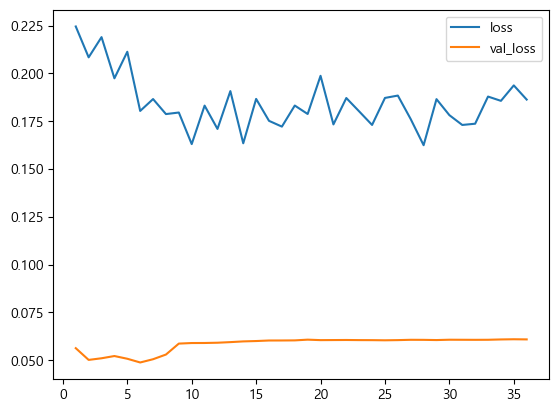

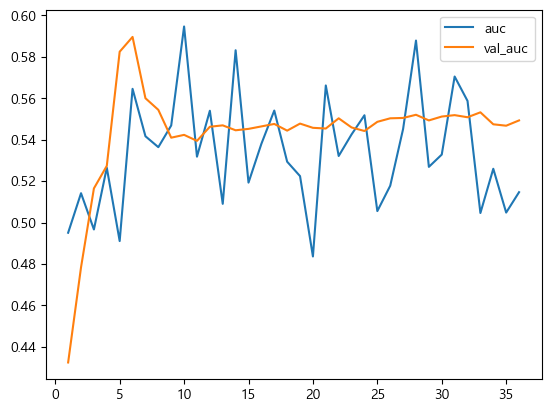

In [14]:
history_df = pd.DataFrame(history.history)
history_df.loc[1:, ['loss', 'val_loss']].plot()
history_df.loc[1:, ['auc', 'val_auc']].plot()

In [15]:
preds_eval = []
for model in models:
    preds_eval.append(model.predict(x))
    
print(classification_report(y, np.round(np.average(np.array(preds_eval),axis=0))))

              precision    recall  f1-score   support

           0       0.93      0.31      0.46      1477
           1       0.14      0.82      0.24       200

    accuracy                           0.37      1677
   macro avg       0.53      0.56      0.35      1677
weighted avg       0.83      0.37      0.43      1677



In [16]:
preds =[]

preds.append(model.predict(test_csv))
pred = np.average(np.array(preds),axis=0)

pred

# 15-3 경로와 파일명 지정
submission = pd.read_csv(path +"sample_submission.csv",index_col="id")
submission['Attrition'] = pred
# 임계값을 0 으로 변경
# submission['Attrition'] = np.where(submission['Attrition'] > 0.5, 1 , 0)


submission.to_csv(path+"submission_5.csv")

submission['Attrition'][:20]

C:\Users\bitcamp\AppData\Local\Temp\ipykernel_16632\271707812.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  submission['Attrition'][:20]


id
1677    0.545951
1678    0.496052
1679    0.557616
1680    0.528669
1681    0.552499
1682    0.544842
1683    0.473236
1684    0.531195
1685    0.490785
1686    0.551435
1687    0.453816
1688    0.569621
1689    0.542735
1690    0.552880
1691    0.498252
1692    0.520265
1693    0.544668
1694    0.578162
1695    0.505160
1696    0.549039
Name: Attrition, dtype: float32